<a href="https://colab.research.google.com/github/Nivash7/assignment_1/blob/main/customer%20conversional%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import necessary libraries and load the dataset
This step includes importing the libraries that are required to perform various operations such as loading data, preprocessing, and model evaluation. In this code, the following libraries are imported:

pandas: used for data manipulation and analysis

numpy: used for numerical operations

sklearn.model_selection: used for splitting the data into training and testing sets

sklearn.preprocessing: used for preprocessing the data such as label 
encoding, one-hot encoding, and standardization

sklearn.linear_model: used for logistic regression

sklearn.ensemble: used for random forest classifier

sklearn.metrics: used for evaluating the model performance



In [ ]:
# Step 1: Import necessary libraries and load the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

reading the dataset using pandas read_Csv file

In [ ]:
data = pd.read_csv('/content/Customer Conversion Prediction - Customer Conversion Prediction.csv')

printing the top 5 columns

In [ ]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
data.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
data.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

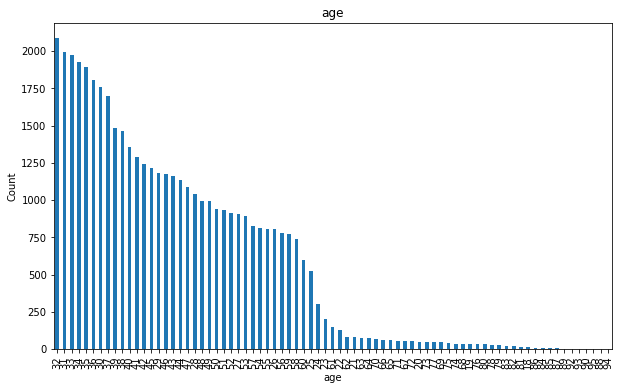

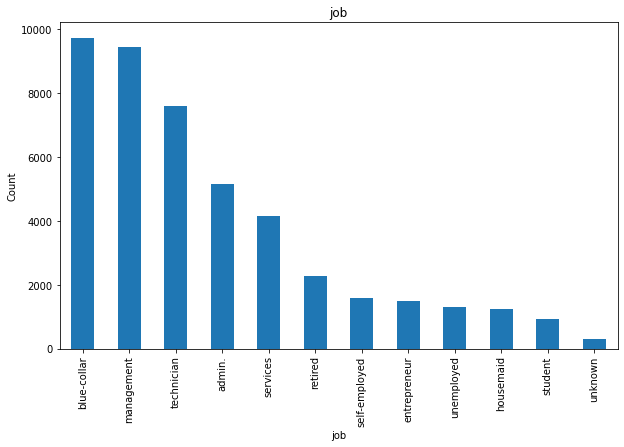

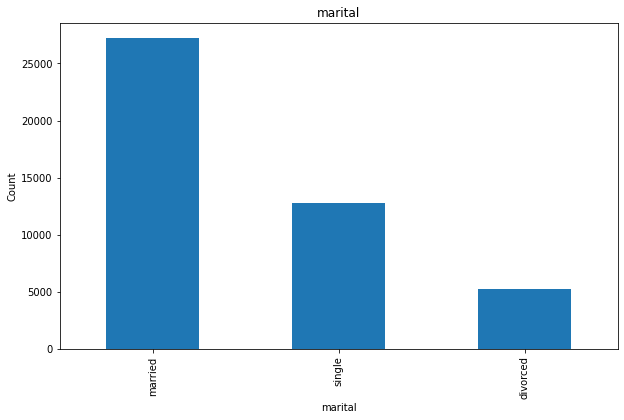

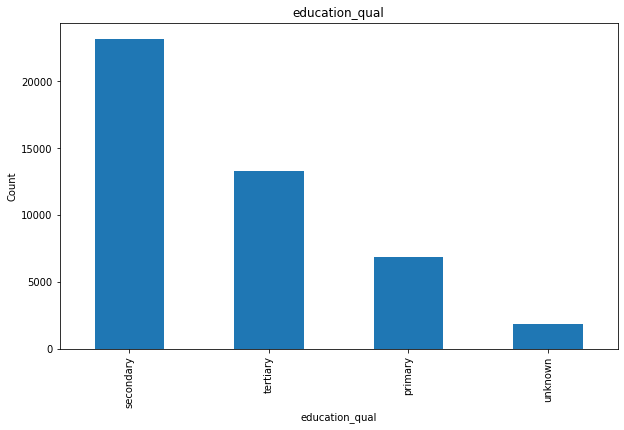

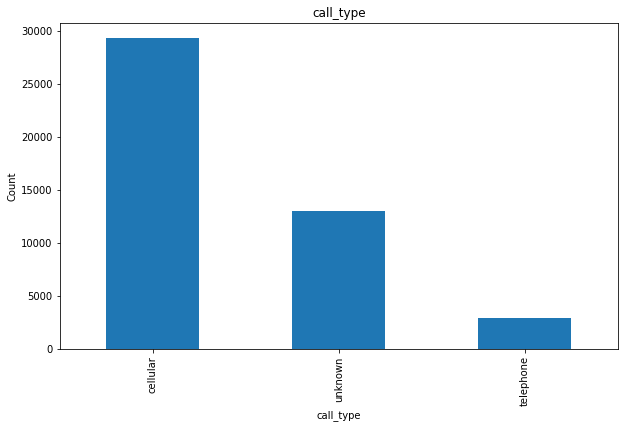

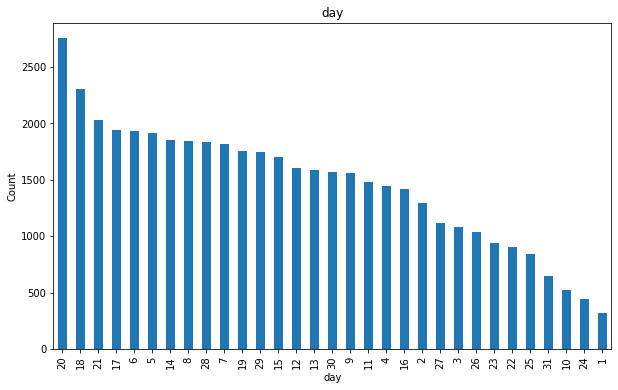

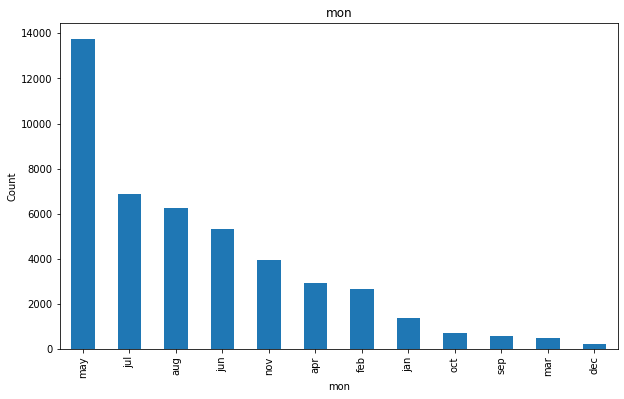

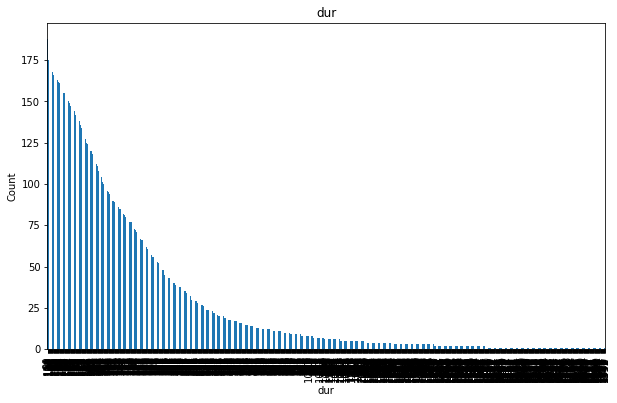

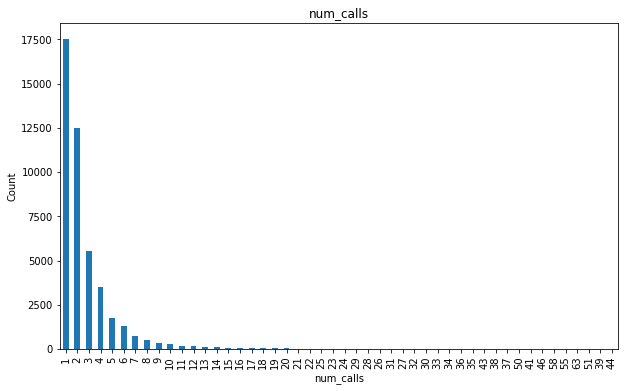

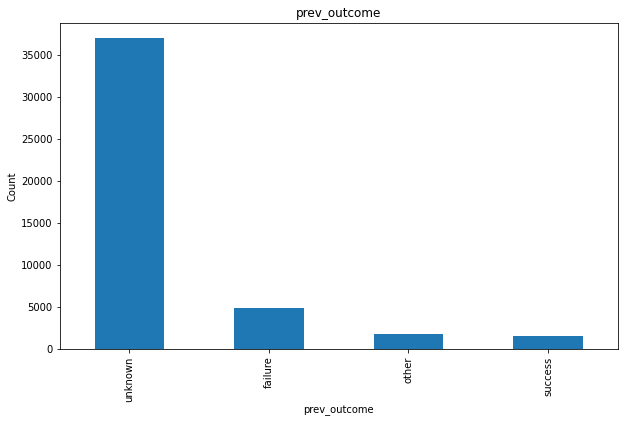

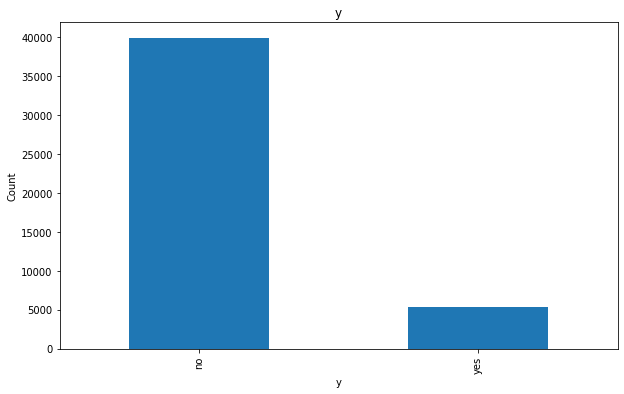

In [ ]:
# Define the independent and dependent variables
independent_vars = ["age", "job", "marital", "education_qual", "call_type", "day", "mon", "dur", "num_calls", "prev_outcome"]
dependent_var = "y"

# Plot a bar plot for each independent variable
for var in independent_vars:
    plt.figure(figsize=(10,6))
    data[var].value_counts().plot(kind="bar")
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

# Plot a bar plot for the dependent variable
plt.figure(figsize=(10,6))
data[dependent_var].value_counts().plot(kind="bar")
plt.title(dependent_var)
plt.xlabel(dependent_var)
plt.ylabel("Count")
plt.show()


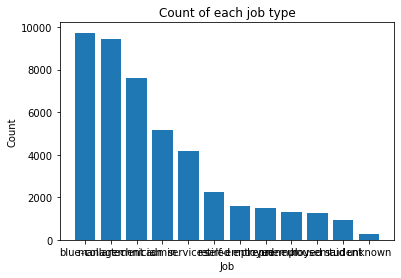

In [ ]:
# create a bar chart
job_counts = data['job'].value_counts()
plt.bar(job_counts.index, job_counts.values)
plt.title('Count of each job type')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

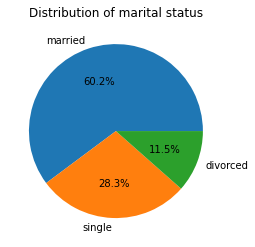

In [ ]:
# create a pie chart
marital_counts = data['marital'].value_counts()
plt.pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%')
plt.title('Distribution of marital status')
plt.show()

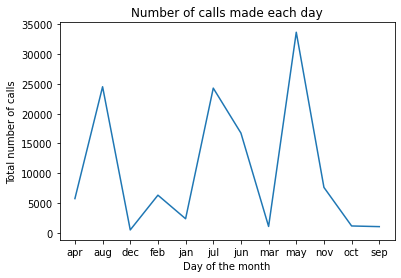

In [ ]:
calls_per_day = data.groupby('mon')['num_calls'].sum()
plt.plot(calls_per_day.index, calls_per_day.values)
plt.title('Number of calls made each day')
plt.xlabel('Day of the month')
plt.ylabel('Total number of calls')
plt.show()

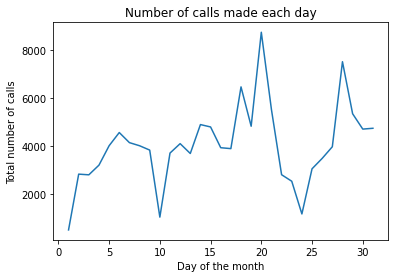

In [ ]:
calls_per_day = data.groupby('day')['num_calls'].sum()
plt.plot(calls_per_day.index, calls_per_day.values)
plt.title('Number of calls made each day')
plt.xlabel('Day of the month')
plt.ylabel('Total number of calls')
plt.show()

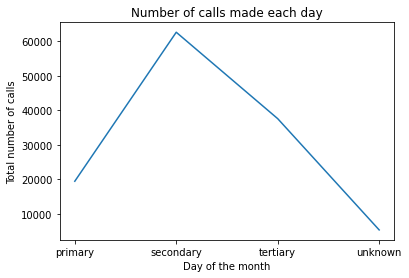

In [ ]:
calls_per_day = data.groupby('education_qual')['num_calls'].sum()
plt.plot(calls_per_day.index, calls_per_day.values)
plt.title('Number of calls made each day')
plt.xlabel('Day of the month')
plt.ylabel('Total number of calls')
plt.show()

Step 2 of the code is focused on cleaning and preprocessing the data. Specifically, it involves encoding categorical variables using LabelEncoder.

The LabelEncoder is a class from the Scikit-Learn library that can be used to transform categorical data into numerical data. The LabelEncoder assigns a unique integer to each category of the variable, starting from 0. For example, if a categorical variable 'job' has the categories 'admin', 'technician', and 'manager', the LabelEncoder will assign the values 0, 1, and 2 to these categories, respectively.

In the code, the LabelEncoder is used to encode six categorical variables: 'job', 'marital', 'education_qual', 'call_type', 'prev_outcome', and 'mon'. Each of these variables is transformed using the fit_transform() method of the LabelEncoder object. This method fits the encoder to the variable, learns the unique categories, and transforms the variable into numerical data.

After encoding the categorical variables, the data is ready for further preprocessing and modeling.

In [ ]:
# Step 2: Data cleaning and preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
data['job'] = label_encoder.fit_transform(data['job'])
data['marital'] = label_encoder.fit_transform(data['marital'])
data['education_qual'] = label_encoder.fit_transform(data['education_qual'])
data['call_type'] = label_encoder.fit_transform(data['call_type'])
data['prev_outcome'] = label_encoder.fit_transform(data['prev_outcome'])
data['mon'] = label_encoder.fit_transform(data['mon'])

After encoding categorical variables, the code scales the numeric variables using the StandardScaler from Scikit-Learn library.

The StandardScaler is a preprocessing technique that standardizes the numerical data to have a mean of 0 and standard deviation of 1. This helps in improving the performance of some machine learning models, especially those that are sensitive to the scale of the input data.

In the code, the StandardScaler is used to scale five numeric variables: 'age', 'day', 'mon', 'dur', and 'num_calls'. These variables are first selected using double square brackets and then transformed using the fit_transform() method of the StandardScaler object.

Overall, this step standardizes the numeric variables to make them more suitable for machine learning models.

In [ ]:
# Scaling numeric variables
scaler = StandardScaler()
data[['age', 'day', 'dur', 'num_calls']] = scaler.fit_transform(data[['age', 'day', 'dur', 'num_calls']])

In this part of the code, one-hot encoding is performed on the 'mon' (month) column of the dataset.

One-hot encoding is a technique used to transform categorical variables into a format that can be used by machine learning models. It creates a new binary column for each unique category of the categorical variable. Each row in the new column is assigned a value of 0 or 1, indicating whether or not that category is present in the original row.

In the code, the get_dummies() function from the Pandas library is used to perform one-hot encoding on the 'mon' column. The function creates a new dataframe called 'month_onehot' with binary columns for each unique value of the 'mon' column.

The 'prefix' argument is used to add a prefix to the name of each new column in the 'month_onehot' dataframe. This is useful to distinguish the one-hot encoded columns from the original columns in the dataset.

The 'drop_first' argument is set to True to drop the first one-hot encoded column. This is because dropping one column prevents the problem of multicollinearity, which is when two or more independent variables are highly correlated with each other.

Finally, the code concatenates the original dataset with the one-hot encoded dataframe using the concat() function. The 'axis' argument is set to 1 to concatenate the dataframes horizontally. After concatenation, the original 'mon' column is dropped from the dataset using the drop() function.

Overall, this step transforms the categorical variable 'mon' into binary columns that can be used by machine learning models.







In [ ]:
# One hot encoding for the month column
month_onehot = pd.get_dummies(data['mon'], prefix='mon', drop_first=True)
data = pd.concat([data, month_onehot], axis=1)
data.drop('mon', axis=1, inplace=True)

In this part of the code, the dataset is split into training and testing sets.

The independent variables (features) are stored in the 'X' variable by dropping the dependent variable (target), which is stored in the 'y' variable. The 'drop' function is used with the 'axis' argument set to 1 to drop the 'y' column from the 'data' dataframe.

Next, the 'train_test_split' function from Scikit-Learn is used to randomly split the data into training and testing sets. The 'test_size' argument is set to 0.2, which means that 20% of the data will be used for testing and the remaining 80% will be used for training. The 'random_state' argument is set to 42 to ensure that the split is reproducible.

After the split, the training features and target are stored in 'X_train' and 'y_train', respectively, while the testing features and target are stored in 'X_test' and 'y_test', respectively.

Overall, this step prepares the data for model training and evaluation by splitting it into independent training and testing sets.

In [ ]:
# Splitting the dataset into training and testing sets
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In this part of the code, a Logistic Regression model is trained on the training set.

First, an instance of the LogisticRegression class is created and stored in the 'logreg' variable. The default hyperparameters of the LogisticRegression class are used.

Next, the 'fit' method of the 'logreg' object is called with the training features 'X_train' and target 'y_train' as arguments. This fits the Logistic Regression model to the training data.

Then, the 'predict_proba' method of the 'logreg' object is called with the testing features 'X_test' as an argument. This predicts the probability of the target variable being 1 for each testing instance. The probability of the target variable being 0 can be calculated by subtracting the predicted probability of 1 from 1.

The predicted probabilities are stored in the 'y_pred_logreg' variable.

Finally, the 'roc_auc_score' function from Scikit-Learn is used to calculate the receiver operating characteristic area under the curve (ROC AUC) score for the Logistic Regression model. The ROC AUC score is a performance metric for binary classification models that evaluates the model's ability to distinguish between positive and negative samples.

Overall, this step trains a Logistic Regression model on the training set and evaluates its performance on the testing set using the ROC AUC score.

In [ ]:
k = 3 # set the number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

y_pred_knn = knn.predict_proba(X_test)[:, 1]
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)


KNN Accuracy: 0.8910759703638174


In [ ]:

# Decision Tree Algorithm
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict_proba(X_test)[:, 1]
tree_roc_auc = roc_auc_score(y_test, y_pred_tree)
tree_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)
print("Decision Tree Accuracy:", tree_acc)

Decision Tree Accuracy: 0.8750414685392016


In [ ]:
# Step 4: Train different classification models on the training set
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict_proba(X_test)[:, 1]
logreg_roc_auc = roc_auc_score(y_test, y_pred_logreg)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In this part of the code, a Random Forest Classifier (RFC) model is trained on the training set.

First, an instance of the RandomForestClassifier class is created and stored in the 'rfc' variable. The hyperparameters of the RandomForestClassifier class used are 100 estimators and a random state of 42.

Next, the 'fit' method of the 'rfc' object is called with the training features 'X_train' and target 'y_train' as arguments. This fits the RFC model to the training data.

Then, the 'predict_proba' method of the 'rfc' object is called with the testing features 'X_test' as an argument. This predicts the probability of the target variable being 1 for each testing instance. The probability of the target variable being 0 can be calculated by subtracting the predicted probability of 1 from 1.

The predicted probabilities are stored in the 'y_pred_rfc' variable.

Finally, the 'roc_auc_score' function from Scikit-Learn is used to calculate the ROC AUC score for the RFC model. The ROC AUC score is a performance metric for binary classification models that evaluates the model's ability to distinguish between positive and negative samples.

Overall, this step trains an RFC model on the training set and evaluates its performance on the testing set using the ROC AUC score.

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict_proba(X_test)[:, 1]
rfc_roc_auc = roc_auc_score(y_test, y_pred_rfc)

printing the results

In [ ]:
# Step 5: Evaluate the models using AUROC as the metric and select the best performing model
print('Logistic Regression AUROC: %.3f' % logreg_roc_auc)
print('Random Forest Classifier AUROC: %.3f' % rfc_roc_auc)

print('KNN AUROC: %.3f' % tree_roc_auc)
print('DECISION TREE AUROC: %.3f' % knn_roc_auc)

Logistic Regression AUROC: 0.875
Random Forest Classifier AUROC: 0.922
KNN AUROC: 0.703
DECISION TREE AUROC: 0.794


In this part of the code, the model with the highest ROC AUC score between the Logistic Regression (logreg) model and the Random Forest Classifier (rfc) model is selected.

The 'if' statement compares the ROC AUC score of the logreg model stored in the 'logreg_roc_auc' variable with the ROC AUC score of the rfc model stored in the 'rfc_roc_auc' variable. If the ROC AUC score of the logreg model is higher than the ROC AUC score of the rfc model, the 'model' variable is set to the logreg model. Otherwise, the 'model' variable is set to the rfc model.

Overall, this step selects the model with the best performance on the testing set and assigns it to the 'model' variable for use in making predictions on new data.

In [ ]:
# Select the best performing model
if logreg_roc_auc > rfc_roc_auc:
    model = logreg
    print('apple')
else:
    model = rfc
    print("grapes")

grapes


In this part of the code, the feature importances of the selected model are analyzed to determine which features contribute the most towards the target variable.

First, a DataFrame named 'feat_importance' is created with two columns: 'Feature' and 'Importance'. The 'Feature' column contains the names of the features in the dataset, while the 'Importance' column contains the importance scores of the features as determined by the selected model.

The importance scores are obtained using the 'feature_importances_' attribute of the selected model object, which returns an array of importance scores for each feature in the same order as the columns of the input data.

Next, the 'sort_values' method of the 'feat_importance' DataFrame is called with 'Importance' as the sorting criterion in descending order. This sorts the DataFrame by feature importance in descending order, so that the most important features are at the top of the DataFrame.

Finally, the top 9 most important features are printed to the console using the 'print' function.

Overall, this step analyzes the feature importances of the selected model to identify which features are most important in predicting the target variable.

In [ ]:
# Step 6: Analyze the important features that contribute towards the target variable
# Get feature importance
feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
print(feat_importance[:9])

          Feature  Importance
6             dur    0.330714
0             age    0.142051
5             day    0.127638
8    prev_outcome    0.071188
1             job    0.064437
7       num_calls    0.050465
3  education_qual    0.036118
2         marital    0.027555
4       call_type    0.025839


This part of the code creates a horizontal bar plot to visualize the feature importance scores of the top 9 features.

First, a DataFrame named 'feat_importance' is created with two columns: 'Feature' and 'Importance'. The 'Feature' column contains the names of the features in the dataset, while the 'Importance' column contains the importance scores of the features as determined by the selected model.

The importance scores are obtained using the 'feature_importances_' attribute of the selected model object, which returns an array of importance scores for each feature in the same order as the columns of the input data.

Next, the 'sort_values' method of the 'feat_importance' DataFrame is called with 'Importance' as the sorting criterion in descending order. This sorts the DataFrame by feature importance in descending order, so that the most important features are at the top of the DataFrame.

Then, a horizontal bar plot is created using the 'barh' method of the 'plt' object. The 'barh' method takes two arguments: the y-axis values and the x-axis values, in that order. In this case, the y-axis values are the top 9 features (i.e., the first 9 rows of the 'feat_importance' DataFrame), and the x-axis values are the importance scores of the corresponding features.

The 'xlabel', 'ylabel', and 'title' methods are used to add labels to the x-axis, y-axis, and the plot title, respectively.

Finally, the 'show' method is called to display the plot in a separate window.

Overall, this step provides a visual representation of the feature importances of the selected model, which can help to identify which features are most important in predicting the target variable.

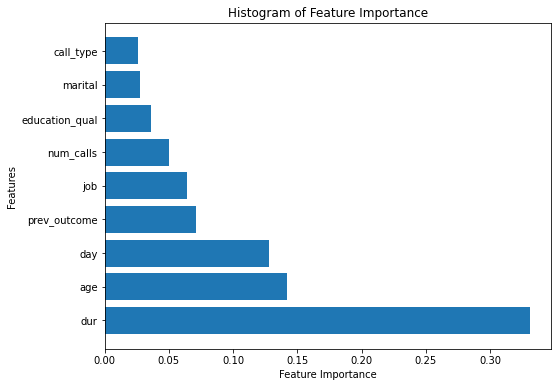

In [ ]:
import matplotlib.pyplot as plt

# Step 6: Analyze the important features that contribute towards the target variable
# Get feature importance
feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 6))


plt.barh(feat_importance['Feature'][:9], feat_importance['Importance'][:9])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Histogram of Feature Importance')
plt.show()



---
The End
